## Network Science Project 2
### Autumn 2021
### Due: December 17th, 4:00pm GMT

Name: Yuning Li            
CID: 01868678

Please enter your name and 8-digit college ID in the cell above

In [1]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#You may also use scipy as needed

### Overview

When working on real-world problems, we often encounter *weighted* networks. In this assignment, you will work through a set of tasks using data for a weighted undirected network where the nodes correspond to regions of the human brain with particular functions, and weighted links indict the density of neuron fiber pathways between regions. You have been provided with the *weight matrix*, $\rm W$, for the network which is defined as follows: $W_{ij}=0$ indicates that there are no connections between regions $i$ and $j$. If $i$ and $j$ are connected, $W_{ij}$ contains the density of connections which can be considered to be an estimate of how much current can flow between the two regions. The only other information about the human brain that is needed for this assignment is that it consists of two parts, a left and right hemisphere.

Code for loading $\rm W$ is provided in the cell below. The file should be save in the same folder as this notebook. Please check that you can load the file, and ask for help if you cannot. The corresponding graph has $N=467$ nodes.

In [2]:
#load weight matrix and output shape
W = np.load('Wproject2.npy')
print("Shape of W is:", W.shape)

Shape of W is: (467, 467)


### Part 1
In lecture 14, the spectral method for community detection in unweighted, undirected graphs was discussed. Here, you will develop code for this method modified for weighted undirected graphs. The code will compute an $N$-element vector, $\rm s$ where $s_i=\pm 1$ and indicates which community node $i$ has been assigned to. The method requires a modification to the definition of the modularity matrix. Let $\tilde k_i = \sum_{j=1}^N W_{ij}$, and $\tilde K = \sum_{i=1}^N \tilde k_i$. The modified modularity matrix is defined as: $$\tilde B_{ij} = W_{ij}-\frac{\tilde k_i \tilde k_j}{\tilde K}$$. The modified spectral method then requires the following steps:
1. Find the $N$-element vector $\rm x$ with $\textrm{x}^T \textrm{x}=N$ which maximizes $\textrm{x}^T \tilde{\textrm{B}} \textrm{x}$ 
2. Adjust $\rm x$ to construct $\rm s$ in the same way that $\tilde{\textrm{s}}$ is adjusted to obtain $\rm s$ for the unweighted case.

Note that the modularity of a set of nodes in a weighted graph, $S_a$, is $\frac{1}{\tilde K}\sum_{i \in S_a} \sum_{j \in S_a} \tilde B_{ij}$.

**1. (a)** (4 pts) Complete the function *spectralW* below so that it **efficiently** applies the modified spectral method to the provided graph and returns both the vector, $\rm s$, and the modified modularity matrix, $\tilde{\textrm{B}}$. The code should not rely on any variables aside from the function input. You may use numpy and scipy as needed, but you should not use any other modules. See the function docstring for further information on the function input and output; please do not modify the input or the return statement. Provide a brief description of your approach in the cell below the function. Note: the code should be designed to work well for general large complex networks such as those listed in table 2.1 of Barabasi's book.

In [3]:
def spectralW(W):
    """Compute partition of weighted undirected network into two communities using modified spectral method.

    Input:
    W: An N x N numpy array corresponding to the network weight matrix

    Output:
    s: An N-element array where each element is +/- 1 and indicates which community each node has been assigned to. 
    
    Btilde: An N x N numpy array corresponding to the modified modularity matrix

    """
    #Use code below as needed
    N = W.shape[0]
    s = np.zeros(N)
    Btilde = np.zeros((N,N))
    #--------------------------
    
    # Calculate ktilde and Ktilde
    ktilde = W.sum(axis=1)
    
    Ktilde = np.sum(ktilde)
    
    # Calculate the modified modularity matrix Btilde
    for i in range(N):
        Btilde[i,] = W[i,]-(ktilde[i]*ktilde)/Ktilde
    
    # Find and order the eigenvalues in B
    from scipy.linalg import eigh
    eigenValues, eigenVectors = eigh(Btilde)
    v1=eigenVectors[:,-1]
    
    #Construct s based on the signs of the elements in stilde
    s = np.ones_like(v1)
    s[v1<=0]=-1

    return s,Btilde #please do not modify

*Add discussion for 1(a) here:*

First calculate $\tilde k$ and $\tilde K$ by definition. Then compute $\tilde B$ row by row also by its definition.

Following the modified spectral method, we first find the $𝑁$-element vector $x$ with $x^Tx=N$ which maximizes $x^T\tilde Bx$. We use the similar method as in unweighted case. We enforce the constraint that $x^Tx=N$ using the Lagrange multiplier, $\gamma$, so turning the problem into: Find $x, \gamma$ such that $Q=x^T\tilde Bx-\gamma (x^Tx-N)$ is maximized. And we require $\frac{\partial Q}{\partial x_l}=0$, after some arithmetic, we get $\sum_{j=1}^{N}\tilde B_{lj}x_j=\gamma x_l$. Therefore $\gamma$ and $x$ are just eigenvalue and eigenvector of $\tilde B$, we solve the eigenvalue problem and rank the eigenvalue, the corresponding eigenvector of the largest eigenvalue will maximize $x^T\tilde Bx$.

Next we adjust $x$ to construct $s$ in the same way that $\tilde s$ is adjusted to obtain $s$ for the unweighted case. Construct $s$ based on the signs of the elements in $\tilde s$. For $x\leq 0$ let the corresponding $s$ be $-1$. For $x>0$ let the corresponding $s$ be $1$. The function `spectralW` returns $s$.

**1.(b)** (2 pts) You have been provided with code below to load the array, nLabel; nLabel[i]=1 if node $i$ is in the right hemisphere of the brain, and nLabel[i]=-1 if node $i$ is in the left hemisphere. Treat the hemisphere-based partition as the "correct" partition. Apply the modified spectral method to the provided weight matrix, and compare the computed partition to this hemisphere-based partition. Determine and state what fraction of the nodes in each computed community have been assigned to the correct hemisphere. Add code to the cell below which carries out the needed computations. Note that multiplying $\rm s$ with $(-1)$ also generates a valid partition. You should choose $\rm s$ or $- \rm s$ based on which more-closely matches the correct partition. 

In [4]:
nLabel = np.load('nLabel.npy')
print("Shape of nLabel is:", nLabel.shape)
#Add code for 1(b) here
# Apply the modified spectral method to the provided weight matrix
s,Btilde = spectralW(W)

# Choose whether s or -s
a = nLabel - s
b = nLabel + s
if np.sum(abs(a)) >= np.sum(abs(b)):
    s = -s

# Count the number of each state in nLabel
count1 = np.count_nonzero(s == 1)
countminus1 = np.count_nonzero(s == -1)
count1n = np.count_nonzero(s-nLabel == 2)
countminus1n = np.count_nonzero(s-nLabel == -2)

# Fraction of the nodes in each computed community have been assigned to the correct hemisphere
fractionr = (count1-count1n)/count1
fractionl = (countminus1-countminus1n)/countminus1

print("The fraction of the nodes in right computed community have been assigned correctly is",fractionr)
print("The fraction of the nodes in left computed community have been assigned correctly is",fractionl)

Shape of nLabel is: (467,)
The fraction of the nodes in right computed community have been assigned correctly is 0.8303886925795053
The fraction of the nodes in left computed community have been assigned correctly is 1.0


*Add discussion for 1(b) here:*

First apply the modified spectral method to the provided weight matrix to get computed community

If for node $i$ the comuted partition is the same as the hemisphere-based partition, $nLabel[i]-s[i]=0$. So first by summing up the absolute value of $s-nLabel$ and $s+nLabel$ to determine whether $s$ or $-s$ more-closely matched the correct partition. We choose the one fits better (the one with lower sum), and then count the total number of regions in different hemisphere of the brain. If $nLabel-s=2$, the node  was assigned to the left hemisphere but is actually in the right hemisphere. If $s-nLabel=-2$, the node was assigned to the right hemisphere but is actually in the left hemisphere. We can minus the number of the nodes in computed community that have been assigned incorrectly by the total number of the nodes in each computed community. Therefore we can deduce the fraction of the nodes in each computed community have been assigned to the correct hemisphere. 

**2.** (3 pts) For brain networks, we are typically interested in partitions with more than 2 communities. Here, you will extend the modified spectral method to construct a partition with 3 communities. The extended method works as follows. Start with the 2-community partition generated by the method. Treat one of the communities as a separate graph. In other words, construct a new graph consisting of the nodes in a community and the weighted links between nodes within the community. Then apply the modified spectral method to this new graph to form two new communities. 
There are two different 3-community partitions that can be formed depending on which of the 2 initial communities is used to construct the new graph. Add code to the cell below to implement this method. The function *spectralW3* should be completed and then called to form both 3-community partitions. See the function docstring for further information on how the code should be designed. Briefly discuss your results below. Explain which 3-community partition is better and if it should be preferred to the original 2-community partition. You have been provided code below to create the new graph given the array $\rm s$ for the 2-community partition.

In [5]:
import networkx as nx
def spectralW3(W,s,l):
    """Compute partition of weighted network into three communities using modified spectral method.

    Input:
    W: An N x N numpy array corresponding to the network weight matrix
    s: An N-element array whose elements are +/- 1 and define the 2-community partition
    l: An integer that should be set to +/- 1. If l=1, then the nodes with s=1 should be used to form the new graph
        for partitioning. Otherwise the nodes with s=-1 should be used

    Output:
    s3: An N-element array where each element is one of three integers and indicates which community each node has been assigned to.
    If l=-1, then for i where s[i]=1, s3[i]=1, and the other elements of s3 should be +/- 10 based on the calculations in the function.
    If l=1, then for i where s[i]=-1, s3[i]=-1, and the other elements of s3 should be +/- 10 based on the calculations.
    """
    
    assert l==1 or l==-1, 'error, l should be +/- 1' #force l to be +/-1
    
    #-------------------------
    #Use code below as needed
    N = W.shape[0]
    s3 = np.zeros(N)

    #construct weight matrix for new graph based on input variables
    G = nx.from_numpy_array(W) 
    ind = np.where(s==l)[0]
    Gnew = G.subgraph(ind).copy() #new graph 
    Wnew = nx.adjacency_matrix(Gnew,weight='weight').toarray()
    Nnew = Gnew.number_of_nodes()
    nList = list(Gnew.nodes()) #nList relates the node numbers of the new graph to the node numbers in the original graph, G. 
                               #nList[i] is the node number in G which corresponds to node i in Gnew    
    #--------------------------
    
    #Add code here
    snew, Btildenew = spectralW(Wnew)
    
    #add 1/-1 to snew so that it has two new indicators
    k=0
    for i in range(N):
        if s[i] == -l:
            s3[i] = -l
        else:
            s3[i]=10*snew[k]
            k+=1
    
    
    return s3 #please do not modify

#Add code here to generate and analyze partitions
s3_1 = spectralW3(W,s,1)
s3_m1 = spectralW3(W,s,-1)
ktilde = W.sum(axis=1)
Ktilde = np.sum(ktilde)
L = Ktilde/2
N = W.shape[0]
M1 = np.dot(np.transpose(s),np.dot(Btilde,s))/(4*L)
M2 = 0
M3 = 0
for i in range(N):
    for j in range(N):
        if s3_1[i]==s3_1[j]==-1:
            M2 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        if s3_1[i]==s3_1[j]==10:
            M2 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        if s3_1[i]==s3_1[j]==-10:
            M2 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        else:
            M2 += 0
for i in range(N):
    for j in range(N):
        if s3_m1[i]==s3_m1[j]==1:
            M3 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        if s3_m1[i]==s3_m1[j]==10:
            M3 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        if s3_m1[i]==s3_m1[j]==-10:
            M3 += (W[i,j]-(ktilde[i]*ktilde[j])/(2*L))/(2*L)
        else:
            M3 += 0
print("The modularity of the 2-community partition is",M1)
print("The modularity of the 3-community partition with l=1 is",M2)
print("The modularity of the 3-community partition with l=-1 is",M3)

The modularity of the 2-community partition is 0.43049808576571735
The modularity of the 3-community partition with l=1 is 0.472532352653094
The modularity of the 3-community partition with l=-1 is 0.45374985823442465


*Add discussion for 2. here*

The code provided generates the new graph depend on $l$. By the function docstring, the node in 3-community partition would be assigned to its partition of the origin one if its original partition is $-l$. Then we apply `spectralW` to *Wnew* which contains the remaining regions(the regions which are assigned to $l$), and the partitions should be +/- 10 based on the calculations in the function. We can done that by enlarge the original result 10 times.

By calculating the modularity, the 3-community partition with l=1 has the highest modularity so it is better. It may be preferred to the original 2-community partition as the human brain only consists of two parts, a left and right hemisphere. Therefore the 2-community partition is more meaningful.

### Part 2

In part 2, you will analyze results produced by the function in the cell below.

In [6]:
"""
Code provided for part 2
"""
W = np.load('Wproject2.npy')

def part2(W,T=10,Nt=100,i0=2,y0=0.001,a=1,b=1):
    from scipy.integrate import odeint
    N = W.shape[0]
 
    def func1(y,t,a,b):
        fac = W.sum(axis=0)
        x1 = y*(b-y/fac)
        C = np.sin(np.subtract.outer(y,y))
        temp = W*C
        x2 = a*temp.sum(axis=0)
        f = x1 + x2
        return f

    yi = np.zeros(N)
    yi[i0] = y0
    t = np.linspace(0,T,Nt+1)
    yf = odeint(func1,yi,t,args=(a,b),rtol=1e-6, atol=1e-6)
    return t,yf

**3.** (2 pts) Explain what the code above does. You should provide a clear and concise description of the problem that the code solves, and an overview of the approach taken by the code to solve the problem. A line-by-line description of the code is not needed. 

*Add discussion for 3. here*

The function gives the value of y of wach desired time t by solving the ordinary differential equation given that there is a node has non-zero frequency initially. The velocity of changing of y is $x_1+x_2$. And it also returns a uniformly divided sequence ranging from 0 to T representing time changing. By this function and given initial condition, we can determine the change of frequencies in time T. For large enough T, we can deduce the stable frequency of each node and the time taken for it to reach stable.

As $W$ is symmetric, $[x_2]_j=a\sum_{i=1}^{N}w_{ij}sin(y_i-y_j)=a\sum_{i=1}^{N}w_{ji}sin(y_i-y_j)$, which indicates the phase influenced by coupling with other linked oscillators with general form $f(y_i-y_j)=sin(y_i-y_j)$. The influence caused by node $j$ to node $i$ depend on the density of connection between two nodes. And $a$ sets the relative importance of the coupling.

Let $[fac]_i=\sum_{j=1}^{N}w_{ji}=k_i$, where $k_i$ represents the outer sum of node $i$. $[x_1]_j=y_j(b-\frac{y_j}{k_j})$ indicates the stable frequency of each node. When b is large, the speed of changing of frequency will be larger, therefore the network will reach stable in shorter time and the stable value of frequencies will be larger.

**4.** (4 pts) Investigate the results generated by the code when $a=0.001$, $a=1$, $b=1$, $b=4$ (four cases in total). You should describe key qualitative trends observed and consider what influence, if any, the community structure of the network has on the results. Your discussion should be supported by well-designed figures (please do not create more than 12 figures). You should vary Nt and T as appropriate. Add the relevant code and discussion in the cells below

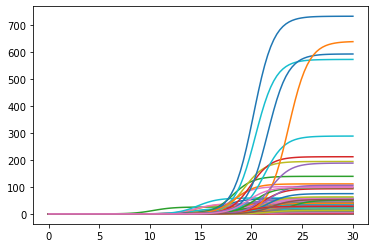

In [7]:
# Graph1: a=0.001, b=1
t1,yf1 = part2(W,T=30,Nt=100,i0=2,y0=0.001,a=0.001,b=1)
plt.plot(t1,yf1)
plt.show()

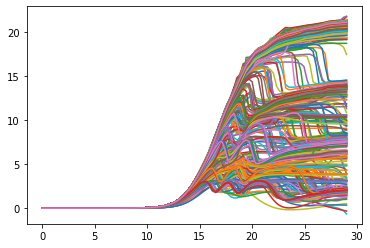

In [8]:
# Graph2: a=1, b=1
t2,yf2 = part2(W,T=29,Nt=100,i0=2,y0=0.001,a=1,b=1)
plt.plot(t2,yf2)
plt.show()

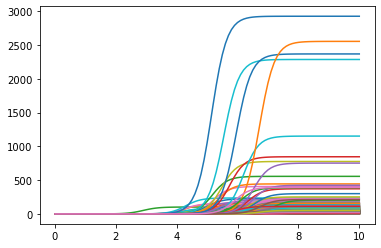

In [9]:
# Graph3: a=0.001, b=4
t3,yf3 = part2(W,T=10,Nt=100,i0=2,y0=0.001,a=0.001,b=4)
plt.plot(t3,yf3)
plt.show()

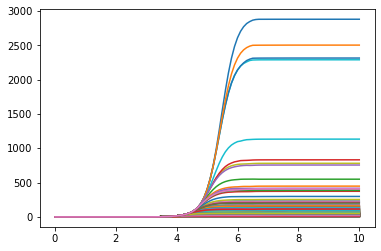

In [10]:
# Graph4: a=1, b=4
t4,yf4 = part2(W,T=10,Nt=100,i0=2,y0=0.001,a=1,b=4)
plt.plot(t4,yf4)
plt.show()

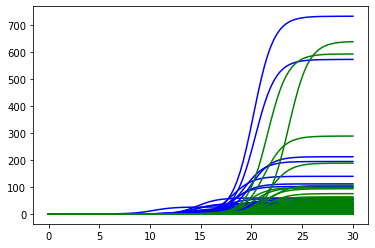

In [11]:
# Graph5: a=0.001, b=1
plt.plot(t1,yf1[:,np.where(nLabel==1)].reshape(yf1[:,np.where(nLabel==1)].shape[0],yf1[:,np.where(nLabel==1)].shape[2]),"b")
plt.plot(t1,yf1[:,np.where(nLabel==-1)].reshape(yf1[:,np.where(nLabel==-1)].shape[0],yf1[:,np.where(nLabel==-1)].shape[2]),"g")
plt.show()

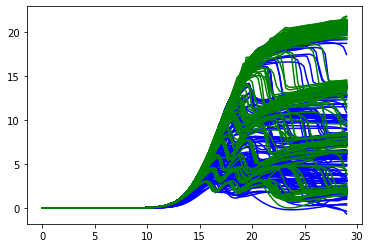

In [12]:
# Graph6: a=1, b=1
plt.plot(t2,yf2[:,np.where(s==1)].reshape(yf2[:,np.where(s==1)].shape[0],yf2[:,np.where(s==1)].shape[2]),"b")
plt.plot(t2,yf2[:,np.where(s==-1)].reshape(yf2[:,np.where(s==-1)].shape[0],yf2[:,np.where(s==-1)].shape[2]),"g")
plt.show()

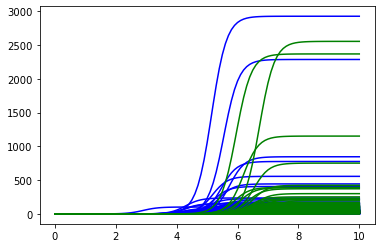

In [13]:
# Graph7: a=0.001, b=4
plt.plot(t3,yf3[:,np.where(s==1)].reshape(yf3[:,np.where(s==1)].shape[0],yf3[:,np.where(s==1)].shape[2]), "b")
plt.plot(t3,yf3[:,np.where(s==-1)].reshape(yf3[:,np.where(s==-1)].shape[0],yf3[:,np.where(s==-1)].shape[2]),"g")
plt.show()

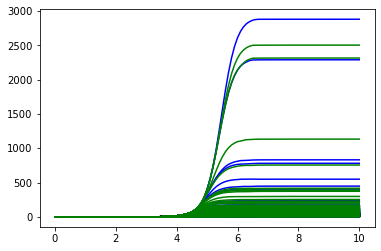

In [14]:
# Graph8: a=1, b=4
plt.plot(t4,yf4[:,np.where(s==1)].reshape(yf4[:,np.where(s==1)].shape[0],yf4[:,np.where(s==1)].shape[2]),"b")
plt.plot(t4,yf4[:,np.where(s==-1)].reshape(yf4[:,np.where(s==-1)].shape[0],yf4[:,np.where(s==-1)].shape[2]),"g")
plt.show()

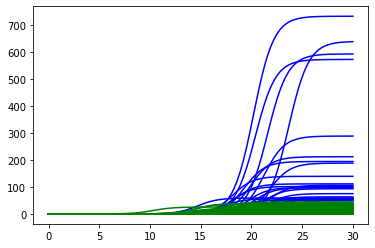

In [15]:
# Graph9: a=0.001, b=1
ktilde = W.sum(axis=1)
plt.plot(t1,yf1[:,np.where(ktilde>=50)].reshape(yf1[:,np.where(ktilde>=50)].shape[0],yf1[:,np.where(ktilde>=50)].shape[2]),"b")
plt.plot(t1,yf1[:,np.where(ktilde<50)].reshape(yf1[:,np.where(ktilde<50)].shape[0],yf1[:,np.where(ktilde<50)].shape[2]),"g")
plt.show()

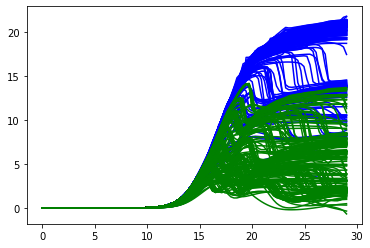

In [16]:
# Graph10: a=1, b=1
plt.plot(t2,yf2[:,np.where(ktilde>=10)].reshape(yf2[:,np.where(ktilde>=10)].shape[0],yf2[:,np.where(ktilde>=10)].shape[2]),"b")
plt.plot(t2,yf2[:,np.where(ktilde<10)].reshape(yf2[:,np.where(ktilde<10)].shape[0],yf2[:,np.where(ktilde<10)].shape[2]),"g")
plt.show()

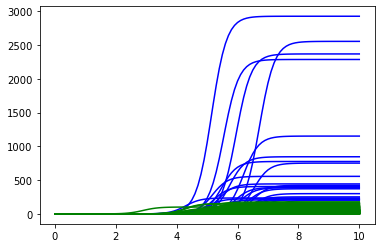

In [17]:
# Graph11: a=0.001,b=4
plt.plot(t3,yf3[:,np.where(ktilde>=50)].reshape(yf3[:,np.where(ktilde>=50)].shape[0],yf3[:,np.where(ktilde>=50)].shape[2]),"b")
plt.plot(t3,yf3[:,np.where(ktilde<50)].reshape(yf3[:,np.where(ktilde<50)].shape[0],yf3[:,np.where(ktilde<50)].shape[2]),"g")
plt.show()

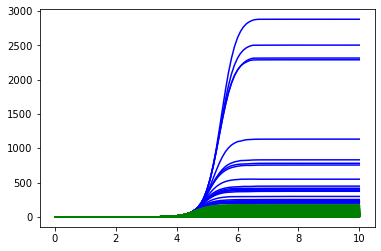

In [19]:
# Graph12: a=1,b=4
plt.plot(t4,yf4[:,np.where(ktilde>=50)].reshape(yf4[:,np.where(ktilde>=50)].shape[0],yf4[:,np.where(ktilde>=50)].shape[2]),"b")
plt.plot(t4,yf4[:,np.where(ktilde<50)].reshape(yf4[:,np.where(ktilde<50)].shape[0],yf4[:,np.where(ktilde<50)].shape[2]),"g")
plt.show()

*Add discussion for 4. here*

Graph1-4 shows the values of y of each node from 0 to T.

By comparing the graph 1 and 2, 3 and 4, we can see the larger the value of a, the more synchronized the changes of each node.

By comparing the graph 1 and 3, 2 and 4, we can see the larger the value of b, the quicker each node reaches stable, and the larger the stable value of y is.

Graph5-8 shows y of different communities. Blue line indicates right hemisphere and green line indicates left hemisphere.

When a is small, the change in value of y is less synchronized in two communities. The time of the start of changing and becoming stable are earlier in right hemisphere than in left hemisphere.(Graph5 and Graph7)

When a/b is less than 1, the stable value in right hemisphere is larger than that in left hemisphere.(Graph5, Graph7 and Graph8)

Graph9-12 shows y of nodes with different outer sum. Blue line indicates nodes with higher outer sum and green line indicates nodes with lower outer sum.

In four cases, the nodes with higher total density of connections between itself and its adjacent nodes have higher stable value.

**5.** (5 pts) Analyze the key trends observed in the results presented for question 4. You should provide clear connections between the observed computational results and the mathematical properties of the problem being solved and of the provided network. Add relevant code and discussion in the cell below. You may include up to 4 additional figures to support your discussion; you may also design your figures for question 4. so that they can be referred to here. You are not required to provide further discussion of the community structure.

*Add discussion for 5. here*

The larger the value of a, the more synchronized the changes of each node(Graph1 and Graph2, Graph3 and Graph4): As $W$ is symmetric, $[x_2]_j=a\sum_{i=1}^{N}w_{ij}sin(y_i-y_j)=a\sum_{i=1}^{N}w_{ji}sin(y_i-y_j)$, which indicates the phase influenced by coupling with other linked oscillators. $x_2$ represents the process of  synchronization and a sets the relative importance of the coupling. Therefore when the coupling has higher relative importance, the change of y of different nodes will be more synchronized.

The larger the value of b, the quicker each node reaches stable, and the larger the stable value of y is(Graph1 and Graph3, Graph2 and Graph4): When b increases, $[x_1]_i=y_j(b-\frac{y_i}{k_i})$ will increases, then the speed of changing of frequency will be larger, therefore the network will reach stable in shorter time and the stable value of frequencies will be larger.

The nodes with higher total density of connections between itself and its adjacent nodes have higher stable value(Graph9-12):  When outer sum of node $i$ increases, both $[x_1]_i=y_j(b-\frac{y_i}{k_i})$ and $[x_2]_i=a\sum_{j=1}^{N}w_{ij}sin(y_j-y_i)$ will be larger as $k_i$ is the outer sum of node i and $w_{ij}$ is proportional to $k_i$. Then the speed of changing of frequency will be larger, therefore the stable value of frequencies will be larger.

### Further guidance

* You should submit both your completed Jupyter notebook and *either* a pdf version or html version of your notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead.
    To submit your assignment, go to the module Blackboard page and click on "Project 2". There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project2.ipynb* and *project2.pdf* or *project2.html*). After attaching the notebook, submit your assignment, and include the message, "This is my own work unless indicated otherwise." to confirm that the submission represents your individual work.
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for question 1.(a) where it should not be used. Please do not any use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your code for question 1.(a), and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. For open-ended questions, we are particularly interested in your ability to identify and explain important properties and trends, and exhaustive descriptions are not needed. While creative ideas based on class material is welcome, you are not expected to base your work on new ideas/concepts/methods that have not been covered (and it is unlikely that credit will be given for such work).
* Open-ended questions require sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions on the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or by arrangement with your Problem class instructor.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term so far.
